In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
import pickle
import warnings
warnings.filterwarnings('ignore') 


In [3]:
df=pd.read_csv("C:/Users/gopal/Downloads/archive/gold-dataset-sinha-khandait.csv")
df

,Dates,URL,News,Price Direction Up,Price Direction Constant,Price Direction Down,Asset Comparision,Past Information,Future Information,Price Sentiment
0,28-01-2016,http://www.marketwatch.com/story/april-gold-do...,"april gold down 20 cents to settle at $1,116.1...",0,0,1,0,1,0,negative
1,13-09-2017,http://www.marketwatch.com/story/gold-prices-s...,gold suffers third straight daily decline,0,0,1,0,1,0,negative
2,26-07-2016,http://www.marketwatch.com/story/gold-futures-...,Gold futures edge up after two-session decline,1,0,0,0,1,0,positive
3,28-02-2018,https://www.metalsdaily.com/link/277199/dent-r...,dent research : is gold's day in the sun comin...,0,0,0,0,0,1,none
4,06-09-2017,http://www.marketwatch.com/story/gold-steadies...,"Gold snaps three-day rally as Trump, lawmakers...",0,0,1,0,1,0,negative
...,...,...,...,...,...,...,...,...,...,...
10565,07-01-2013,https://www.moneycontrol.com/news/business/mar...,gold seen falling from 3-week high this week,0,0,1,0,1,0,negative
10566,27-09-2018,https://www.metalsdaily.com/link/284468/domini...,dominic frisby : now looks like a good time to...,1,0,0,0,0,1,positive
10567,03-03-2017,https://www.thehindubusinessline.com/markets/g...,Gold heading for worst week since November on ...,0,0,1,0,1,0,negative
10568,11-06-2008,http://www.marketwatch.com/story/august-gold-u...,august gold up $7.60 at $878.80 an ounce on nymex,1,0,0,0,1,0,positive


In [4]:
df.shape

(10570, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10570 entries, 0 to 10569
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Dates                     10570 non-null  object
 1   URL                       10570 non-null  object
 2   News                      10570 non-null  object
 3   Price Direction Up        10570 non-null  int64 
 4   Price Direction Constant  10570 non-null  int64 
 5   Price Direction Down      10570 non-null  int64 
 6   Asset Comparision         10570 non-null  int64 
 7   Past Information          10570 non-null  int64 
 8   Future Information        10570 non-null  int64 
 9   Price Sentiment           10570 non-null  object
dtypes: int64(6), object(4)
memory usage: 825.9+ KB


In [6]:
df.isnull().sum()

Dates                       0
URL                         0
News                        0
Price Direction Up          0
Price Direction Constant    0
Price Direction Down        0
Asset Comparision           0
Past Information            0
Future Information          0
Price Sentiment             0
dtype: int64

In [7]:
df['Price Sentiment'].value_counts()

Price Sentiment
positive    4412
negative    3814
none        1968
neutral      376
Name: count, dtype: int64

In [8]:
df['Price Sentiment'].unique()

array(['negative', 'positive', 'none', 'neutral'], dtype=object)

In [9]:
df['Price Sentiment']=df['Price Sentiment'].map({'negative': 1, 'positive':2, 'neutral':3, 'none':4})
df

,Dates,URL,News,Price Direction Up,Price Direction Constant,Price Direction Down,Asset Comparision,Past Information,Future Information,Price Sentiment
0,28-01-2016,http://www.marketwatch.com/story/april-gold-do...,"april gold down 20 cents to settle at $1,116.1...",0,0,1,0,1,0,1
1,13-09-2017,http://www.marketwatch.com/story/gold-prices-s...,gold suffers third straight daily decline,0,0,1,0,1,0,1
2,26-07-2016,http://www.marketwatch.com/story/gold-futures-...,Gold futures edge up after two-session decline,1,0,0,0,1,0,2
3,28-02-2018,https://www.metalsdaily.com/link/277199/dent-r...,dent research : is gold's day in the sun comin...,0,0,0,0,0,1,4
4,06-09-2017,http://www.marketwatch.com/story/gold-steadies...,"Gold snaps three-day rally as Trump, lawmakers...",0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
10565,07-01-2013,https://www.moneycontrol.com/news/business/mar...,gold seen falling from 3-week high this week,0,0,1,0,1,0,1
10566,27-09-2018,https://www.metalsdaily.com/link/284468/domini...,dominic frisby : now looks like a good time to...,1,0,0,0,0,1,2
10567,03-03-2017,https://www.thehindubusinessline.com/markets/g...,Gold heading for worst week since November on ...,0,0,1,0,1,0,1
10568,11-06-2008,http://www.marketwatch.com/story/august-gold-u...,august gold up $7.60 at $878.80 an ounce on nymex,1,0,0,0,1,0,2


Price Sentiment
positive    4412
negative    3814
none        1968
neutral      376
Name: count, dtype: int64

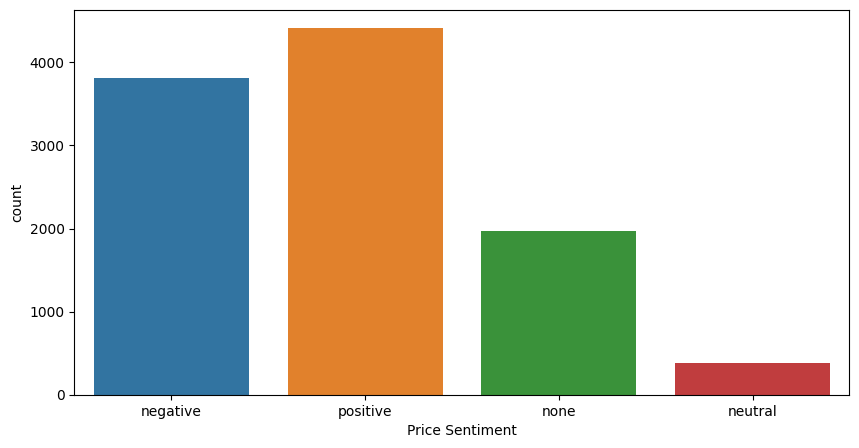

In [10]:
plt.figure(figsize=(10,5))
sentiment_mapping = {1: 'negative', 2: 'positive', 3: 'neutral', 4: 'none'}

# Map the numerical values to 'Price Sentiment' labels
df['Price Sentiment'] = df['Price Sentiment'].map(sentiment_mapping)

sns.countplot(x='Price Sentiment', data=df) 
df['Price Sentiment'].value_counts()

In [11]:
df.describe(include='all')

,Dates,URL,News,Price Direction Up,Price Direction Constant,Price Direction Down,Asset Comparision,Past Information,Future Information,Price Sentiment
count,10570,10570,10570,10570.000000,10570.000000,10570.000000,10570.000000,10570.000000,10570.00000,10570
unique,3761,10570,10570,NaN,NaN,NaN,NaN,NaN,NaN,4
top,30-08-2017,http://www.marketwatch.com/story/april-gold-do...,"april gold down 20 cents to settle at $1,116.1...",NaN,NaN,NaN,NaN,NaN,NaN,positive
freq,18,1,1,NaN,NaN,NaN,NaN,NaN,NaN,4412
mean,NaN,NaN,NaN,0.417408,0.042006,0.370104,0.189309,0.969915,0.03018,NaN
std,NaN,NaN,NaN,0.493155,0.200612,0.482855,0.391773,0.170830,0.17109,NaN
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,NaN
25%,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,NaN
50%,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,NaN
75%,NaN,NaN,NaN,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,NaN


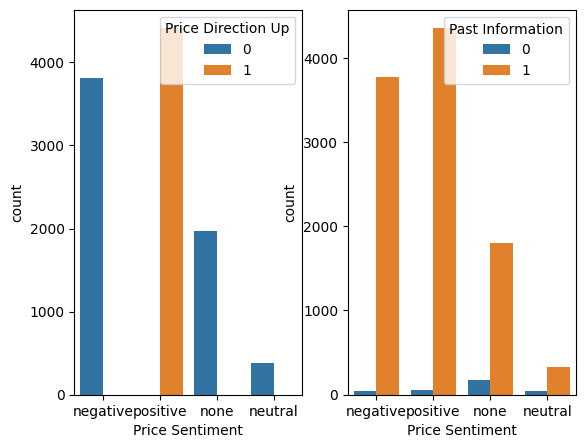

In [12]:
plt.figure(figsize=(10, 5))  # Adjust the figure size as needed

# Subplot 1
plt.subplot(131)
sns.countplot(data=df, x='Price Sentiment', hue='Price Direction Up')

# Subplot 2
plt.subplot(132)
sns.countplot(data=df, x='Price Sentiment', hue='Past Information')

# Show the plot
plt.show()


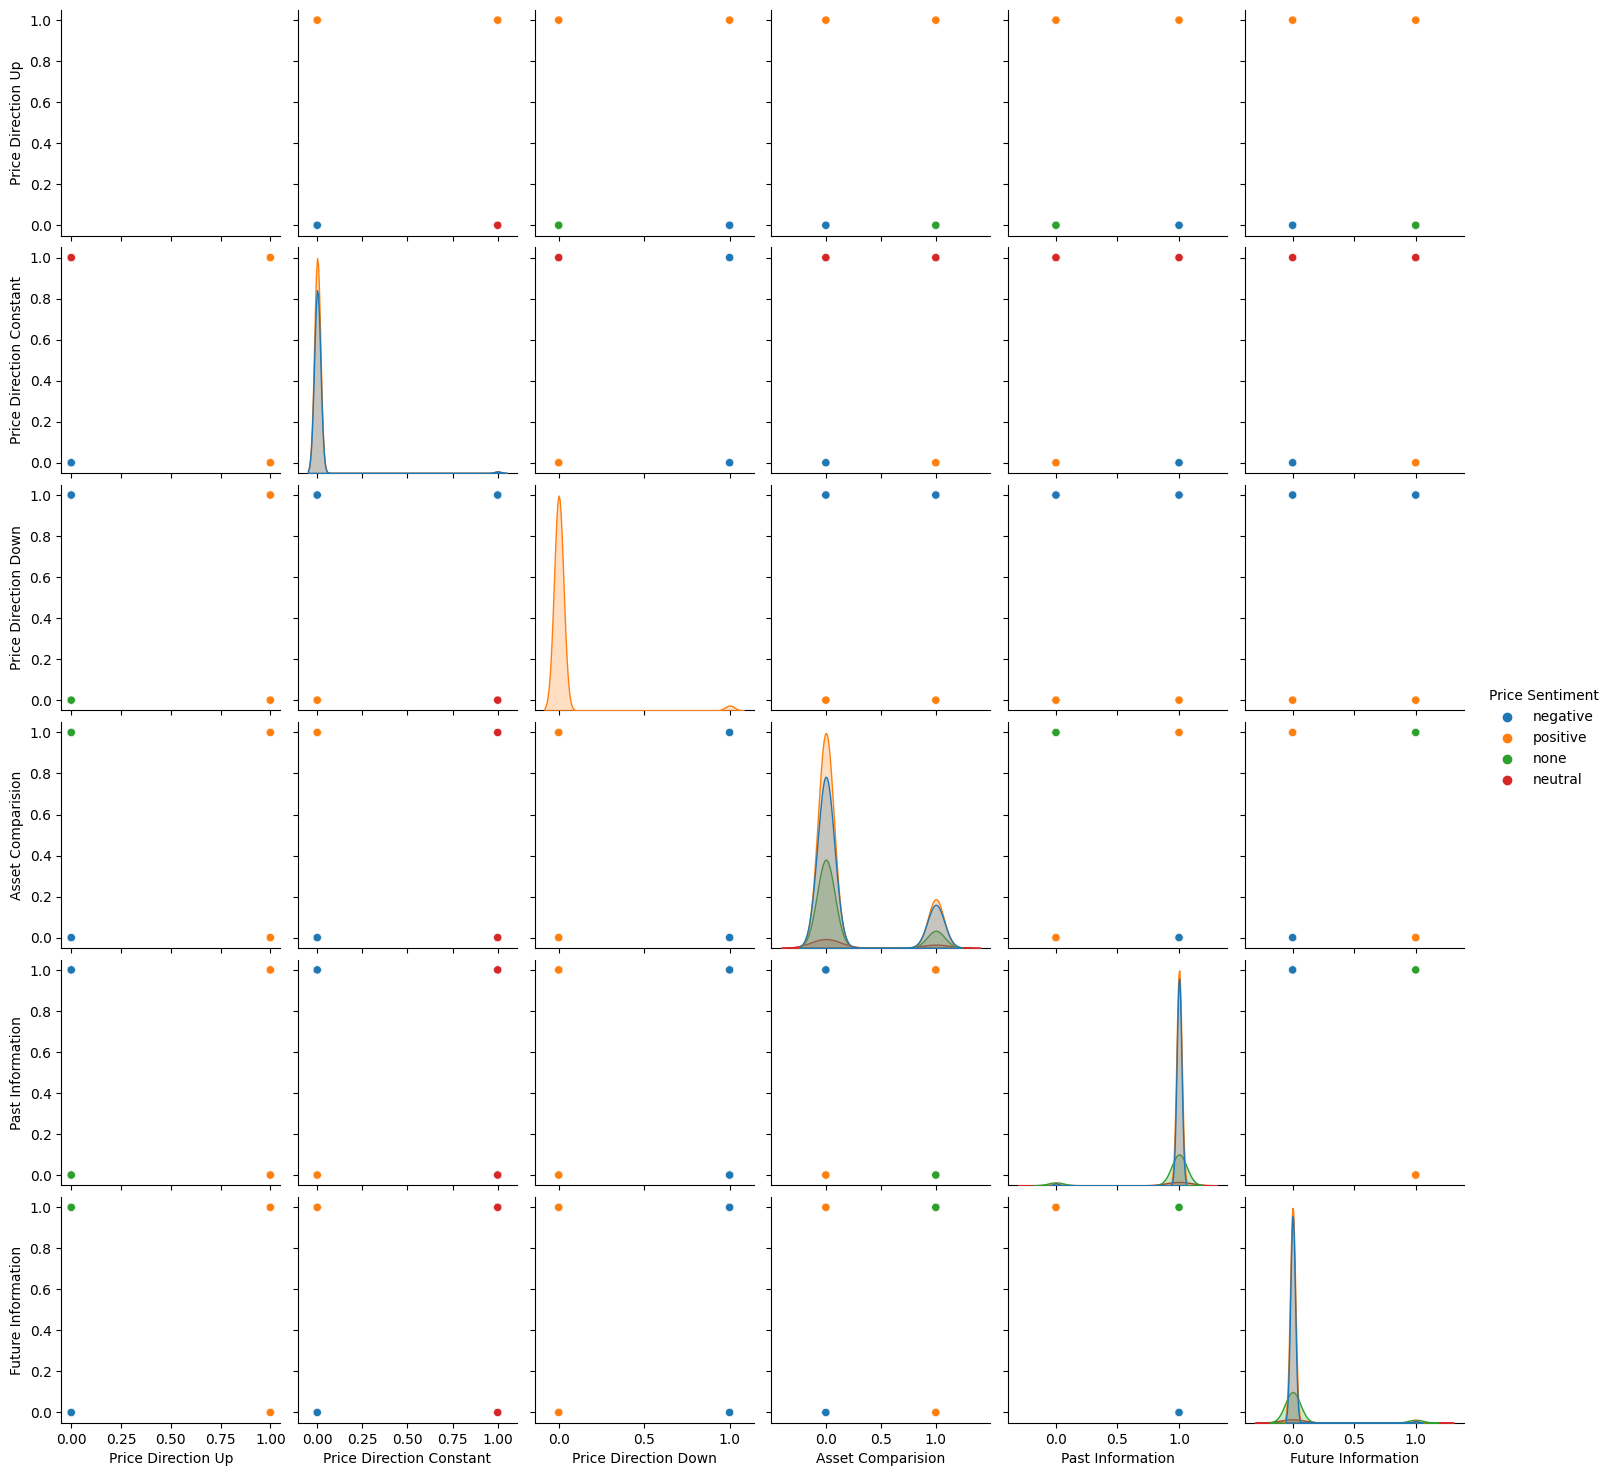

In [13]:
sns.pairplot(df,hue='Price Sentiment')

In [14]:
df.columns

Index(['Dates', 'URL', 'News', 'Price Direction Up',
       'Price Direction Constant', 'Price Direction Down', 'Asset Comparision',
       'Past Information', 'Future Information', 'Price Sentiment'],
      dtype='object')

In [15]:
df.drop(columns = ['Dates', 'URL', 'Price Direction Up','Price Direction Constant','Price Direction Down','Asset Comparision','Past Information','Future Information'],inplace=True)
df

,News,Price Sentiment
0,"april gold down 20 cents to settle at $1,116.1...",negative
1,gold suffers third straight daily decline,negative
2,Gold futures edge up after two-session decline,positive
3,dent research : is gold's day in the sun comin...,none
4,"Gold snaps three-day rally as Trump, lawmakers...",negative
...,...,...
10565,gold seen falling from 3-week high this week,negative
10566,dominic frisby : now looks like a good time to...,positive
10567,Gold heading for worst week since November on ...,negative
10568,august gold up $7.60 at $878.80 an ounce on nymex,positive


In [16]:
#Applying the text cleaning

import re

import string

#This function converts to lower-case, removes square bracket, removes numbers and punctuation

def text_clean_1(text):
    text = text.lower() #converts to lower-case or upper case 
    text = re.sub('\[.*?\]', '', text) #it will remove .,?,"", []
    text = re.sub('[%s]' % re.escape(string.punctuation), '',text) # #it will resove"",.
    text = re.sub('\w*\d\w*', '', text) 
    text = re.sub('[''""...]','', text)  #it will remove and
    text = re.sub('\n', '', text)
    return text

Cleaned_News = lambda x: text_clean_1(x)

In [17]:
df['Cleaned_News']=pd.DataFrame(df.News.apply(Cleaned_News))
df.head(10)


,News,Price Sentiment,Cleaned_News
0,"april gold down 20 cents to settle at $1,116.1...",negative,april gold down cents to settle at
1,gold suffers third straight daily decline,negative,gold suffers third straight daily decline
2,Gold futures edge up after two-session decline,positive,gold futures edge up after twosession decline
3,dent research : is gold's day in the sun comin...,none,dent research is golds day in the sun coming ...
4,"Gold snaps three-day rally as Trump, lawmakers...",negative,gold snaps threeday rally as trump lawmakers r...
5,"Dec. gold climbs $9.40, or 0.7%, to settle at ...",positive,dec gold climbs or to settle at
6,"gold falls by rs 25 on sluggish demand, global...",negative,gold falls by rs on sluggish demand global cues
7,"Gold futures fall for the session, but gain fo...",positive,gold futures fall for the session but gain for...
8,"Gold struggles; silver slides, base metals falter",neutral,gold struggles silver slides base metals falter
9,"april gold holds slight gain, up $2.50, or 0.2...",positive,april gold holds slight gain up or at


In [18]:
#independent varible
x=df['Cleaned_News']
x.head(10)

0                 april gold down  cents to settle at 
1            gold suffers third straight daily decline
2        gold futures edge up after twosession decline
3    dent research  is golds day in the sun coming ...
4    gold snaps threeday rally as trump lawmakers r...
5                   dec gold climbs  or  to settle at 
6     gold falls by rs  on sluggish demand global cues
7    gold futures fall for the session but gain for...
8      gold struggles silver slides base metals falter
9             april gold holds slight gain up  or  at 
Name: Cleaned_News, dtype: object

In [19]:
#dependent varible
y=df['Price Sentiment']
y.head(10)

0    negative
1    negative
2    positive
3        none
4    negative
5    positive
6    negative
7    positive
8     neutral
9    positive
Name: Price Sentiment, dtype: object

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)
print("x_train:",len(x_train))
print("x_test:",len(x_test))
print("y_train:",len(y_train))
print("y_test:",len(y_test))

x_train: 8456
x_test: 2114
y_train: 8456
y_test: 2114


In [21]:
from sklearn. feature_extraction. text import TfidfVectorizer 
from sklearn.linear_model import LogisticRegression
tvec = TfidfVectorizer()

clf2 = LogisticRegression()

In [22]:
from sklearn. pipeline import Pipeline
model= Pipeline([(' vectorizer', tvec), ('classifier', clf2)]) 
model.fit(x_train,y_train)
from sklearn.metrics import confusion_matrix
predictions = model.predict(x_test) 
pred_train=model.predict(x_train) 
confusion_matrix(predictions, y_test)

array([[701,  15,  26,  29],
       [  1,  50,   1,   2],
       [ 31,   9, 330,  48],
       [ 36,  15,  34, 786]], dtype=int64)

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
svm=SVC(kernel='linear')
#tvec = TfidfVectorizer()

In [24]:
#from sklearn.pipeline import Pipeline 
#pipeline:- The Pipeline class is a utility class in sklearn that helps to chain multiple steps of data preprocessing and model building into a single object
model2 = Pipeline([('vectorizer',tvec),('classifier',svm)])
model2.fit(x_train,y_train)
from sklearn.metrics import confusion_matrix
predictions2 = model2.predict(x_test)
pred2_train=model2.predict(x_train)
confusion_matrix(predictions2, y_test)

array([[694,   8,  23,  32],
       [  4,  57,   2,   7],
       [ 32,  11, 331,  45],
       [ 39,  13,  35, 781]], dtype=int64)

In [25]:
example = ["gold to trade in 28670-29160 range: achiievers equities"]
result = model.predict(example)
print(result)

['neutral']


In [26]:
example = ["gold to trade in 28670-29160 range: achiievers equities"]
result = model2.predict(example)
print(result)

['neutral']


In [27]:
example = ["can investment in gold, sensex & ppfs give the same returns?"]
result = model.predict(example)
print(result)

['none']


In [28]:
example = ["can investment in gold, sensex & ppfs give the same returns?"]
result = model2.predict(example)
print(result)

['none']


In [29]:
#for Logistic Regression
from sklearn.metrics import classification_report
# assume y_train and pred_train are your true and predicted labels, respectively
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

    negative       0.91      0.91      0.91       769
     neutral       0.93      0.56      0.70        89
        none       0.79      0.84      0.82       391
    positive       0.90      0.91      0.91       865

    accuracy                           0.88      2114
   macro avg       0.88      0.81      0.83      2114
weighted avg       0.88      0.88      0.88      2114



In [30]:
#for SVM
from sklearn.metrics import classification_report
# assume y_train and pred2_train are your true and predicted labels, respectively
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

    negative       0.92      0.90      0.91       769
     neutral       0.81      0.64      0.72        89
        none       0.79      0.85      0.82       391
    positive       0.90      0.90      0.90       865

    accuracy                           0.88      2114
   macro avg       0.86      0.82      0.84      2114
weighted avg       0.88      0.88      0.88      2114



In [31]:
#Logistic Regression
from sklearn.metrics import accuracy_score
print("Accuracy_test : ", accuracy_score(predictions, y_test))
print("Accuracy_train : ", accuracy_score(pred_train, y_train))

Accuracy_test :  0.8831598864711447
Accuracy_train :  0.9331835383159887


In [32]:
#SVM
#from sklearn.metrics import accuracy_score
print("Accuracy_test: ", accuracy_score(predictions2, y_test))
print("Accuracy_train : ", accuracy_score(pred2_train, y_train))

Accuracy_test:  0.881267738883633
Accuracy_train :  0.9427625354777672


In [33]:
import pickle 
pickle.dump(model,open('goldnewsanalysis.pkl','wb'))